# Using Regions of interest (ROIs) in DeepOF - Explore spatial information

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lucasmiranda42/deepof/blob/master/docs/source/tutorial_notebooks/deepof_supervised_tutorial.ipynb)

##### What we'll cover:
    
* Create a project with ROIs
* Vasic ROI functionality
* Visualize information contained in specific ROIs
* Extract information based on different ROIs

In [1]:
# # If using Google colab, uncomment and run this cell and the one below to set up the environment
# # Note: because of how colab handles the installation of local packages, this cell will kill your runtime.
# # This is not an error! Just continue with the cells below.
# import os
# !git clone -q https://github.com/mlfpm/deepof.git
# !pip install -q -e deepof --progress-bar off
# os.chdir("deepof")
# !curl --output tutorial_files.zip https://datashare.mpcdf.mpg.de/s/Hu1XjZkY9zml0mm/download
# !unzip tutorial_files.zip

In [2]:
# import os
# os.chdir("deepof")
# import os, warnings
# warnings.filterwarnings('ignore')

As usual, we import some packages and plotting gear. We'll use python's os library to handle paths, pickle to load saved objects, and the data entry API within DeepOF, located in deepof.data

In [3]:
# Import basic stuff
import os
import pickle
import deepof.data
# import plotting gear
import deepof.visuals
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a project with ROIs

All we have to do in the project definition to create a project with ROIs is to set the input argument “number_of_rois” to any number between 1 and 20. This will then let us draw our ROIs during project creation

In [4]:
my_deepof_project_raw = deepof.data.Project(
    project_path=os.path.join("tutorial_files"),
    video_path=os.path.join("tutorial_files/Videos/"),
    table_path=os.path.join("tutorial_files/Tables/"),
    project_name="deepof_tutorial_project",
    arena="circular-autodetect",
    animal_ids=["B", "W"],
    table_format="h5",
    video_format=".mp4",
    exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"],
    video_scale=380,
    iterative_imputation="partial",  # "full",
    smooth_alpha=1,
    exp_conditions="./tutorial_files/tutorial_exp_conditions.csv", # path to exp conditions table
    number_of_rois=3, # an optional input argument that allows you to draw up to 20 different regions of interest (ROI)s during project creation
)

As we run our Tutorial scripts automatically for testing purposes and the create function opens a GUI which would interfere with that, the follwoing line of code it is commented out. To create your own project, you can simply remove the "#" at the front of the line and execute it. 

In [5]:
# my_deepof_project_with_rois = my_deepof_project_raw.create(force=True)

After the arenas are detected (which will take a short while with the automatic detection) one after another, three windows will plop up for you to click your three ROIs just as you would click a nanual polygonal arena (see Figure below). You will always have to click all of the ROIs for one video, then all ROIs for the next one and so on. And just as you can do with the arenas in manual mode, you can propagate single ROIs with the "p"-key. This means that the respective ROI will get copied for all following videos and you will not have to click it manually. However, this means that the ROI will be copied exactly from the previous video. If you have a ROI that may differ from video to video or if your videos are rather inconsistent, it may make more sense to manually click your ROIs for all videos. For this example case we click an upper half area, a lower half area and a central circular area (as in the Figure below).

![rois](./Assets/roi_GUI.png)

### Loading a previously initiated project

You can now continue to use your own project or just load the larger deepof test project with 53 videos.

In [6]:
# Load a previously saved project
my_deepof_project_with_rois = deepof.data.load_project("./tutorial_files/tutorial_project")

**NOTE** to better show how DeepOF deals with statistics, all results shown in the documentation version of this tutorial were obtained using the full SI dataset, containing a total of 53 animals. If you'd like to gain access to this dataset, check out the code availability statement of the main DeepOF paper.

### Basic ROI functionality

For starters, let us have a look at our ROIs for our different experiment conditions. Setting a ROI number in plot_heatmaps will lead to this ROI getting applied to all experiments in the project. If a mouse is inside or outside of a ROI is determined via the position of the center of the mouse. And which mice are relevant for that evaluation is dermined via animals_in_roi.

For this example with roi_number=1 and animals_in_roi="B" we consider all instances during which mouse B (the black mouse) was inside of ROI 1 (the upper half of the arena) for nonstressed and stressed mice. The Respectively, the position of the white mouse does not matter here.


Info! The selected range for plotting exceeds the maximum number of 250 samples allowed for plotting!
To plot the selected full range the plot will be downsampled accordingy by a factor of approx. 5.
To avoid this, you can increase the input parameter "samples_max", but this also increases computation time.

Info! The selected range for plotting exceeds the maximum number of 250 samples allowed for plotting!
To plot the selected full range the plot will be downsampled accordingy by a factor of approx. 5.
To avoid this, you can increase the input parameter "samples_max", but this also increases computation time.


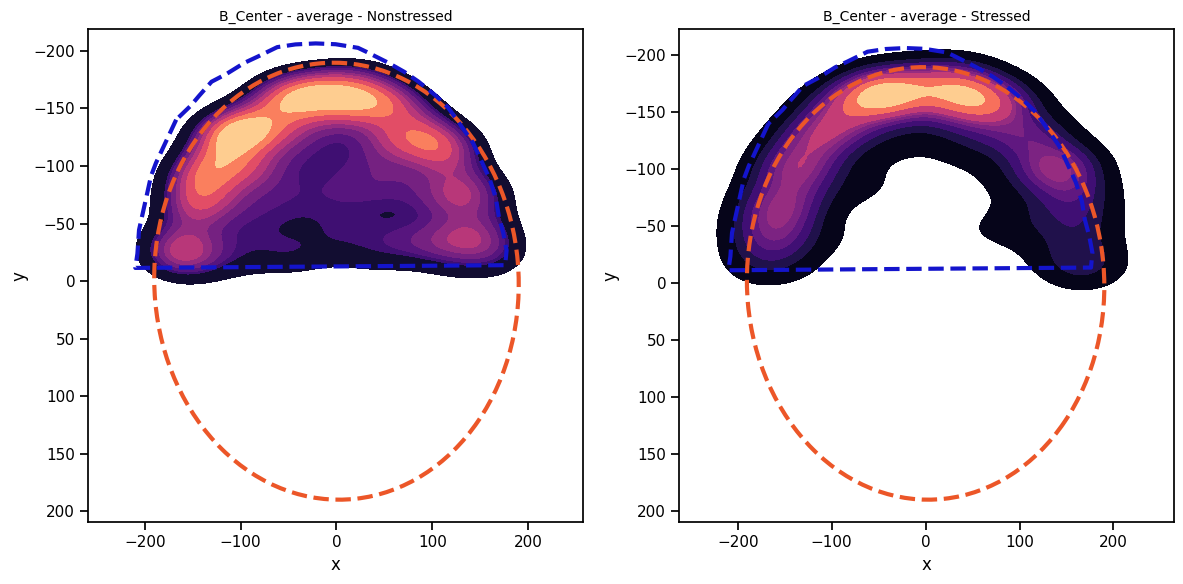

In [7]:
sns.set_context("notebook")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Nose based plot
deepof.visuals.plot_heatmaps(
    my_deepof_project_with_rois, 
    ["B_Center"],
    center="arena", 
    exp_condition="CSDS",
    condition_value="Nonstressed",
    ax=ax1,
    show=False,
    display_arena=True,
    experiment_id="average",
    # Time binning info
    bin_index=2,  
    bin_size=60,
    samples_max=250, # we reduce the maximum number of samples per experiment to allow for a fatser function execution
    # ROI arguments
    roi_number=1,
    animals_in_roi="B",
)

# Center based plot
deepof.visuals.plot_heatmaps(
    my_deepof_project_with_rois,
    ["B_Center"],
    center="arena", 
    exp_condition="CSDS",
    condition_value="Stressed", 
    ax=ax2,
    show=False,
    display_arena=True,
    experiment_id="average",
    # Time binning info
    bin_index=2,  
    bin_size=60,
    samples_max=250,
    # ROI arguments
    roi_number=1,
    animals_in_roi="B",
)

plt.tight_layout()
plt.show()

As we can see, the average of our ROIs is a bit to the left of the average arena. This is what can happen if the ROIs are not all clicked individually for all videos as the arena itself is not at the exact same position in each video.

Next, just to understand the ROI funtionality a bit better, we will have a look at two special cases: 
* In the first case we extract the **nose positions** of the black mouse whilst this **black mouse was inside of ROI 3**. As we can see, some activity is detected outside of the ROI. This happens because the center position of the mouse is used to determine if the mouse is inside of the ROI. Hence, a Mouse standing just on the edge of a ROI and looking outside is still technically "inside" of that ROI.
* In the second example we track the **center of the black mouse** for all frames during which the **white mouse is inside of ROI 3**. As this doesn't apply any restrictions to the position of the black mosue, we will see activity in the whole arena.


Info! The selected range for plotting exceeds the maximum number of 250 samples allowed for plotting!
To plot the selected full range the plot will be downsampled accordingy by a factor of approx. 5.
To avoid this, you can increase the input parameter "samples_max", but this also increases computation time.

Info! The selected range for plotting exceeds the maximum number of 250 samples allowed for plotting!
To plot the selected full range the plot will be downsampled accordingy by a factor of approx. 5.
To avoid this, you can increase the input parameter "samples_max", but this also increases computation time.


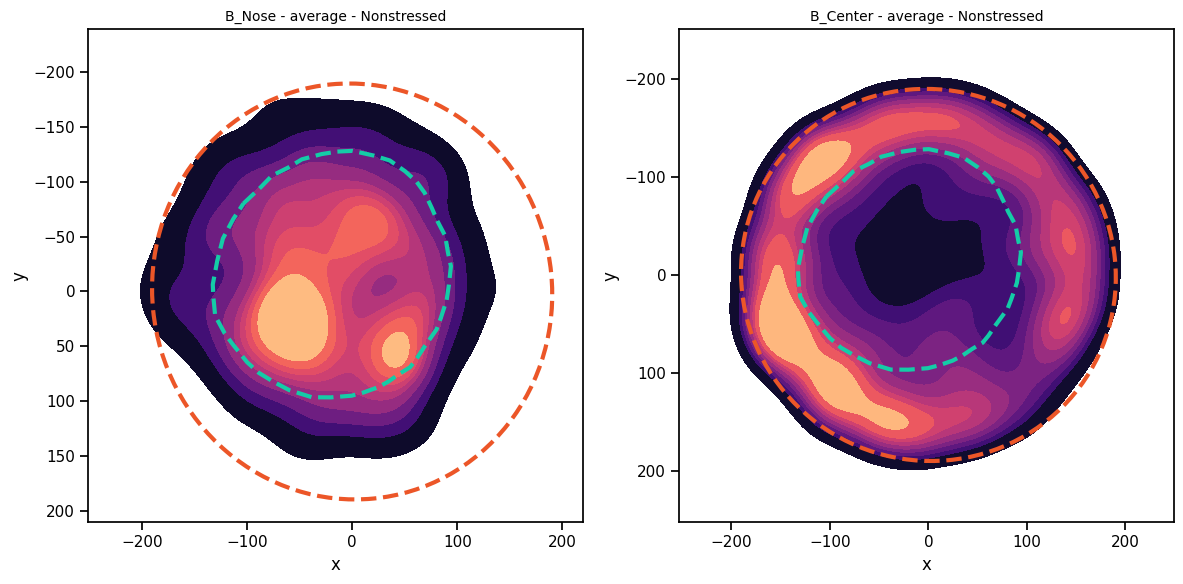

In [8]:
sns.set_context("notebook")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Nose based plot
deepof.visuals.plot_heatmaps(
    my_deepof_project_with_rois, 
    ["B_Nose"],
    center="arena", 
    exp_condition="CSDS",
    condition_value="Nonstressed",
    ax=ax1,
    show=False,
    display_arena=True,
    experiment_id="average",
    # Time binning info
    bin_index=2,  
    bin_size=60,
    samples_max=250,
    # ROI arguments
    roi_number=3,
    animals_in_roi="B",
)

# Center based plot
deepof.visuals.plot_heatmaps(
    my_deepof_project_with_rois,
    ["B_Center"],
    center="arena", 
    exp_condition="CSDS",
    condition_value="Nonstressed", 
    ax=ax2,
    show=False,
    display_arena=True,
    experiment_id="average",
    # Time binning info
    bin_index=2,  
    bin_size=60,
    samples_max=250,
    # ROI arguments
    roi_number=3,
    animals_in_roi="W",
)

plt.tight_layout()
plt.show()

The roi_functionality works similar for other visualization options, such as the skeleton animation. Here we animate all data for the first 20 seconds (as determined by bin_index and bin_size) during which the black mouse ("B") is in the top half of the arena, independent of the position of the white mouse ("W").

In [9]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project_with_rois,
    experiment_id="20191204_Day2_SI_JB08_Test_54",
    bin_index=0,
    bin_size=20,
    sampling_rate=25,
    dpi=60,
    roi_number=1,
    animals_in_roi="B",
)

html = display.HTML(video)
display.display(html)
plt.close()

If we instead want that both mice are inside of the ROI, we can also simply set animals_in_roi using a list.

In [10]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project_with_rois,
    experiment_id="20191204_Day2_SI_JB08_Test_54",
    bin_index=0,
    bin_size=20,
    sampling_rate=25,
    dpi=60,
    roi_number=1,
    animals_in_roi=["B", "W"],
)

html = display.HTML(video)
display.display(html)
plt.close()

### Plotting with ROIs 

For most of the other plots we either need supervised or unsupervised annotations, so let's quickly compute just that

In [11]:
supervised_annotation = my_deepof_project_with_rois.supervised_annotation()

supervised annotations        : 100%|██████████| 53/53 [01:12<00:00,  1.37s/table, step=post processing]   


Now we can apply ROIs to Gant plots, Enrichment plots, and more.

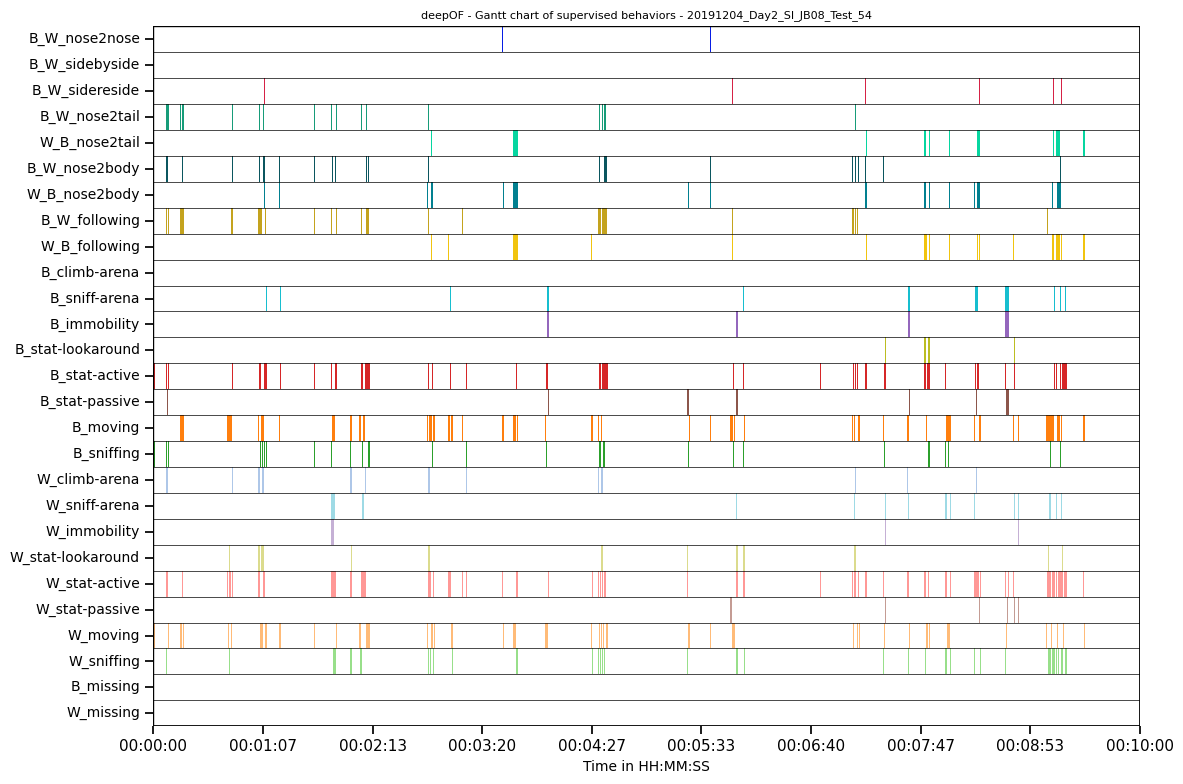

In [12]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    my_deepof_project_with_rois,
    "20191204_Day2_SI_JB08_Test_54",
    supervised_annotations=supervised_annotation,
    roi_number=1,
    animals_in_roi=["B","W"],
)

plt.show()

This Gantt-plot is a lot more sparse than it's pendant in the supervised tutorial, which is expected, as we only include frames during which both mice are in the upper half of the arena.

Some plots like plot_enrichment have an additional roi setting specifically for supervised annotations. 
* **The roi_mode is always set to "mousewise" as a default**. This means that the ROIs behave exactly as in all examples before, occuring behaviors are only included if the animals given in animals_in_roi were inside of the ROI during that time. If no animals_in_roi input is explicietly given, all available animals need to be inside of the ROI.  
* If the roi_mode is set to "behaviorwise" instead, the animals_in_roi input is ignored. Now all behaviors are included during which the mice taking part in that behavior were inside of the ROI. This means that for e.g. B_immobility it is only relevant that the black mouse was inside of the ROI during detection. For W_immobility only the white mouse needs to be inside of the ROI and for paired behaviors, such as W_B_following, both mice need to be inside of the ROI.

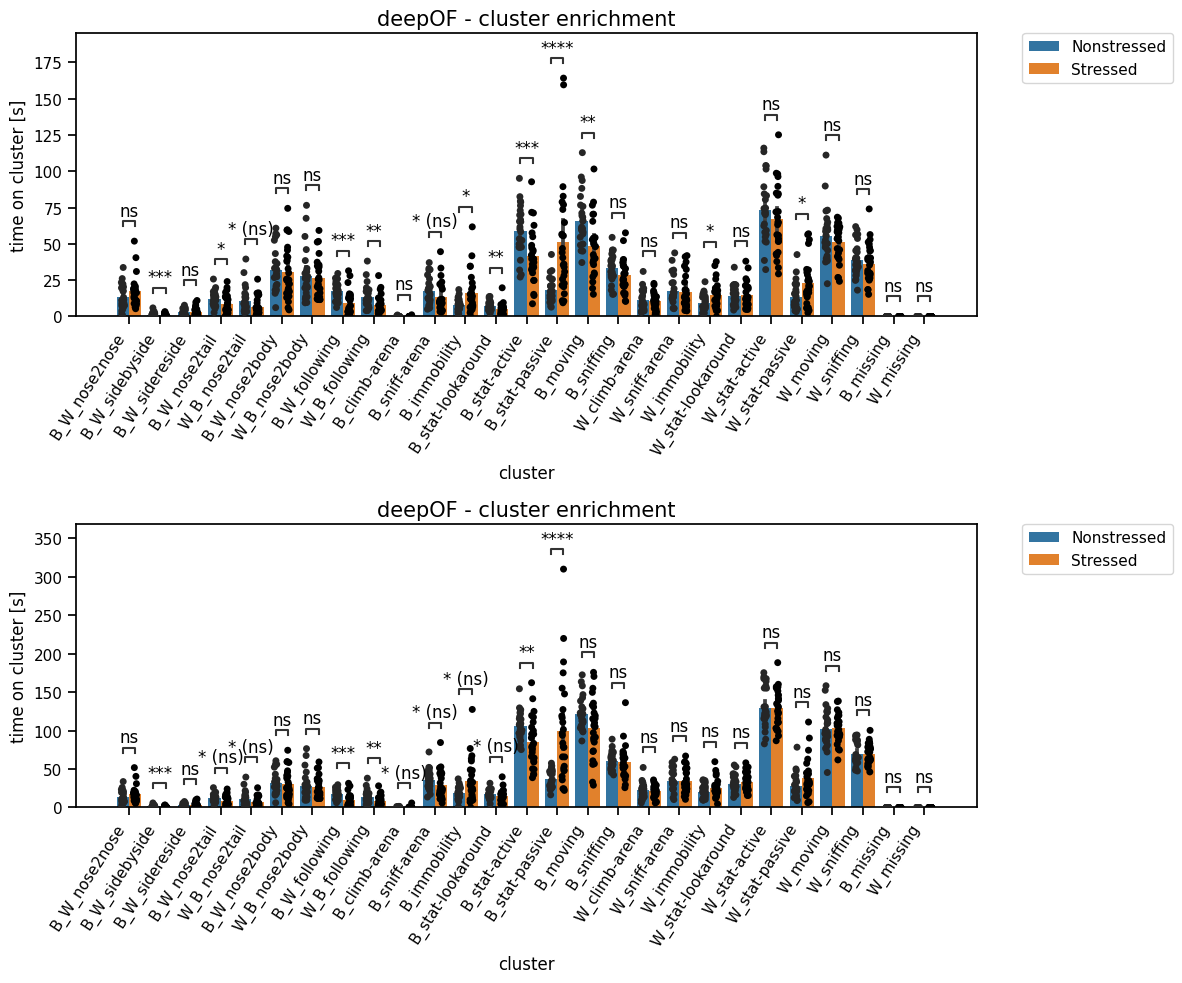

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

deepof.visuals.plot_enrichment(
    my_deepof_project_with_rois,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=False,
    roi_number = 1,
    roi_mode = "mousewise", 
    animals_in_roi=["B","W"],
    ax = ax1,
)

deepof.visuals.plot_enrichment(
    my_deepof_project_with_rois,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=False,
    roi_number = 1,
    roi_mode = "behaviorwise",
    ax = ax2,
)
    
plt.tight_layout()    
plt.show()

Other plot functions, such as plot_transitions, plot_stationary_entropy, plot_embeddings or plot_behavior_trends as well as export_annotated_video also support the roi functionality. But we can also access the data itself using ROIs.

### Extract data directly using ROIs

Plotting all of this may look nice, but maybe you want to create your own, even nicer plot. For this we have various ways to extract data directly after ROI application

Extracting coordinates works exactly as described in the [preprocessing tutorial](https://deepof.readthedocs.io/en/latest/tutorial_notebooks/deepof_preprocessing_tutorial.html). It only requires the addition of the roi_number you want to use and the animals that should be inside of that ROI. All frames during which these conditions were not fulfilled will be set to NaN.

In [14]:
coords = my_deepof_project_with_rois.get_coords(roi_number=1, animals_in_roi=["B","W"])
coords.filter_id("B")['20191204_Day2_SI_JB08_Test_54']

B_Center             B_Left_bhip              \
                             x           y           x           y   
00:00:00            178.695067  150.903525  178.133481  164.579831   
00:00:00.040002666  178.695067  150.903525  178.133481  164.579831   
00:00:00.080005333  178.695067  150.903525  178.133481  164.579831   
00:00:00.120008     177.009679  149.650528  175.106624  163.666017   
00:00:00.160010667  177.767518  147.833830  173.779126  162.437004   
...                        ...         ...         ...         ...   
00:09:59.799986665         NaN         NaN         NaN         NaN   
00:09:59.839989332         NaN         NaN         NaN         NaN   
00:09:59.879991999         NaN         NaN         NaN         NaN   
00:09:59.919994666         NaN         NaN         NaN         NaN   
00:09:59.959997333         NaN         NaN         NaN         NaN   

                    B_Left_ear             B_Left_fhip              \
                             x           y           x           y   
00:00:00            160.236194  129.369839  162.932410  149.543005   
00:00:00.040002666  160.236194  129.369839  162.932410  149.543005   
00:00:00.080005333  160.236194  129.369839  162.932410  149.543005   
00:00:00.120008     163.807836  124.262824  161.761900  147.278549   
00:00:00.160010667  167.520924  121.969513  163.445137  144.056996   
...                        ...         ...         ...         ...   
00:09:59.799986665         NaN         NaN         NaN         NaN   
00:09:59.839989332         NaN         NaN         NaN         NaN   
00:09:59.879991999         NaN         NaN         NaN         NaN   
00:09:59.919994666         NaN         NaN         NaN         NaN   
00:09:59.959997333         NaN         NaN         NaN         NaN   

                        B_Nose              ... B_Right_ear              \
                             x           y  ...           x           y   
00:00:00            166.288734  115.459213  ...  175.473650  127.391220   
00:00:00.040002666  166.288734  115.459213  ...  175.473650  127.391220   
00:00:00.080005333  166.288734  115.459213  ...  175.473650  127.391220   
00:00:00.120008     174.192032  112.040097  ...  180.079795  125.958622   
00:00:00.160010667  179.274246  108.299092  ...  183.599288  123.947488   
...                        ...         ...  ...         ...         ...   
00:09:59.799986665         NaN         NaN  ...         NaN         NaN   
00:09:59.839989332         NaN         NaN  ...         NaN         NaN   
00:09:59.879991999         NaN         NaN  ...         NaN         NaN   
00:09:59.919994666         NaN         NaN  ...         NaN         NaN   
00:09:59.959997333         NaN         NaN  ...         NaN         NaN   

                   B_Right_fhip               B_Spine_1              \
                              x           y           x           y   
00:00:00             181.920601  137.218331  170.050867  140.762637   
00:00:00.040002666   181.920601  137.218331  170.050867  140.762637   
00:00:00.080005333   181.920601  137.218331  170.050867  140.762637   
00:00:00.120008      184.009635  136.824217  171.210362  138.769813   
00:00:00.160010667   186.337662  135.377970  173.565589  136.397291   
...                         ...         ...         ...         ...   
00:09:59.799986665          NaN         NaN         NaN         NaN   
00:09:59.839989332          NaN         NaN         NaN         NaN   
00:09:59.879991999          NaN         NaN         NaN         NaN   
00:09:59.919994666          NaN         NaN         NaN         NaN   
00:09:59.959997333          NaN         NaN         NaN         NaN   

                     B_Spine_2             B_Tail_base              
                             x           y           x           y  
00:00:00            190.880247  157.459358  204.986693  161.780679  
00:00:00.040002666  190.880247  157.459358  204.986693  161.780679  
00:00:00.080005333  190.

For merging tables, one should take care to enter the correct arguments in both data retrival function calls. Otherwise missmatches can happen, as in this example, in which different roi numbers were used for the standard coords and distance tables.

In [15]:
my_deepof_project_with_rois.get_coords(roi_number=1, animals_in_roi=["B","W"]).merge(my_deepof_project_with_rois.get_areas(roi_number=2, animals_in_roi=["B","W"]))['20191204_Day2_SI_JB08_Test_54']

,"(B_Center, x)","(B_Center, y)","(B_Left_bhip, x)","(B_Left_bhip, y)","(B_Left_ear, x)","(B_Left_ear, y)","(B_Left_fhip, x)","(B_Left_fhip, y)","(B_Nose, x)","(B_Nose, y)",...,"(W_Tail_base, x)","(W_Tail_base, y)",B_head_area,B_torso_area,B_back_area,B_full_area,W_head_area,W_torso_area,W_back_area,W_full_area
00:00:00,178.695067,150.903525,178.133481,164.579831,160.236194,129.369839,162.932410,149.543005,166.288734,115.459213,...,284.276209,81.953327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:00.040002666,178.695067,150.903525,178.133481,164.579831,160.236194,129.369839,162.932410,149.543005,166.288734,115.459213,...,284.276209,81.953327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:00.080005333,178.695067,150.903525,178.133481,164.579831,160.236194,129.369839,162.932410,149.543005,166.288734,115.459213,...,284.276209,81.953327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:00.120008,177.009679,149.650528,175.106624,163.666017,163.807836,124.262824,161.761900,147.278549,174.192032,112.040097,...,293.070473,82.577959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:00.160010667,177.767518,147.833830,173.779126,162.437004,167.520924,121.969513,163.445137,144.056996,179.274246,108.299092,...,299.036433,86.246318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:09:59.799986665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,239.351756,336.178223,369.570164,1236.107578,338.985792,306.291532,398.589194,1296.123237
00:09:59.839989332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,225.022660,337.583006,356.664988,1202.726262,339.620050,307.614990,401.612088,1299.472646
00:09:59.879991999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,254.932272,347.361879,366.539329,1240.353140,339.318562,307.496487,402.713953,1300.378284
00:09:59.919994666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,254.932272,347.361879,366.539329,1240.353140,339.318562,307.496487,402.713953,1300.378284


Similarily, we can also count events using ROIs

In [16]:
deepof.visuals.count_all_events(
    my_deepof_project_with_rois,
    supervised_annotations=supervised_annotation,
    bin_size=60,
    bin_index=0,
    counting_mode = "Events",
    roi_number=1,
    animals_in_roi="B",
)

,B_W_nose2nose,B_W_sidebyside,B_W_sidereside,B_W_nose2tail,W_B_nose2tail,B_W_nose2body,W_B_nose2body,B_W_following,W_B_following,B_climb-arena,...,W_immobility,W_stat-lookaround,W_stat-active,W_stat-passive,W_moving,W_sniffing,B_missing,W_missing,B_speed,W_speed
20191203_Day1_SI_JB08_Test_5,1,0,0,0,0,0,0,0,1,0,...,3,5,21,4,25,74,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_6,3,0,1,0,2,3,4,0,3,0,...,1,2,12,1,14,31,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_7,1,0,1,6,1,3,2,5,3,0,...,0,1,10,0,11,26,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_8,5,4,1,8,1,10,2,9,1,0,...,1,3,15,1,14,34,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_13,2,0,1,0,1,4,2,3,0,0,...,2,0,15,3,16,30,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_14,4,0,0,3,0,9,1,3,1,0,...,2,7,21,2,22,48,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_15,7,0,0,0,2,6,6,0,1,0,...,3,3,22,3,23,53,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_16,1,0,0,0,2,1,3,0,1,0,...,1,10,25,1,25,59,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_22,1,0,0,0,0,0,1,0,0,0,...,2,6,25,3,28,59,0,0,NaN,NaN
20191203_Day1_SI_JB08_Test_23,0,0,0,7,0,9,0,7,0,0,...,0,0,7,0,8,21,0,0,NaN,NaN


### Wrapping up

Thank you for making it until the end. In general ROIs can be applied to most functions for which it makes sense. In future updates we are going to implement some options that will enable automatic ROI creations based on requirements such as "the inner 70% of the area". So stay tuned.